---
#Eksploracja i Wizualizacja Danych(EWD)

#Ćwiczenia numer 3 (09.11.2024r.)
---

---
##Zadanie 1 (Wizualizacja danych) - 1 punkt za aktywność
---

**a)** Wgrać zbiór danych *inflation-gdp* ze strony:

https://datahub.io/core/inflation

**b)** Wydrukować statystyki dotyczące analizowanego zbioru.

**c)** Wygenerować wykres przedstawiający zmieniające się wartości wskaźnika inflacji dla wartości PKB dla całej Unii Europejskiej w latach 1971 - 2016.

**d)** Wygenerować 3 oddzielne poziome wykresy słupkowe uśrednionej wartości wskaźnika inflacji dla wartości PKB dla poszczególnych państw zaczynających się na litery "P", "S", "T".

**e)** Wygenerować stosowny rodzaj wykresu wizualizujący wartość średnią, wariancję, wartość maksymalną, wartość minimalną wskaźnika inflacji dla wartości PKB dla Polski w latach 1991 - 2016.

(**nota:** przy generowaniu wykresu proszę kierować się wytycznymi podanymi na Wykładzie dotyczącymi aspektów estetyki generowanych wykresów - pod tym kątem będą oceniane wygenerowane wykresy w kontekście ich kompletności)


Rozwiązanie podpunktu **(a)**

In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

df = pd.read_csv('inflation-gdp.csv')
df

,Country,Country Code,Year,Inflation
0,Arab World,ARB,1969,1.303790
1,Arab World,ARB,1970,2.602241
2,Arab World,ARB,1971,6.884719
3,Arab World,ARB,1972,2.496081
4,Arab World,ARB,1973,11.555281
...,...,...,...,...
11009,Zimbabwe,ZWE,2012,2.563181
11010,Zimbabwe,ZWE,2013,2.805703
11011,Zimbabwe,ZWE,2014,0.700921
11012,Zimbabwe,ZWE,2015,0.898072


Rozwiązanie podpunktu **(b)**

In [25]:
stats = df.describe(include='all')
stats

#IQR = df.quantile(0.75, numeric_only=True) - df.quantile(0.25, numeric_only=True)
#print(IQR)

#variance = df.var(numeric_only=True)
#print(variance)
#Year            234.166926 std => 15 => niska wariancja lata oscyluja w okolicy sredniej
#Inflation    148198.381216 std => 384 => wysoka wariancja moga wystepowac ekstremalne odychlenia w inflacji



,Country,Country Code,Year,Inflation
count,11014,11014,11014.000000,11014.000000
unique,255,255,NaN,NaN
top,Zimbabwe,ZWE,NaN,NaN
freq,56,56,NaN,NaN
mean,NaN,NaN,1992.209551,27.776900
std,NaN,NaN,15.302514,384.965429
min,NaN,NaN,1961.000000,-98.703831
25%,NaN,NaN,1980.000000,2.502159
50%,NaN,NaN,1994.000000,5.680057
75%,NaN,NaN,2005.000000,10.827582


Rozwiązanie podpunktu **(c)**

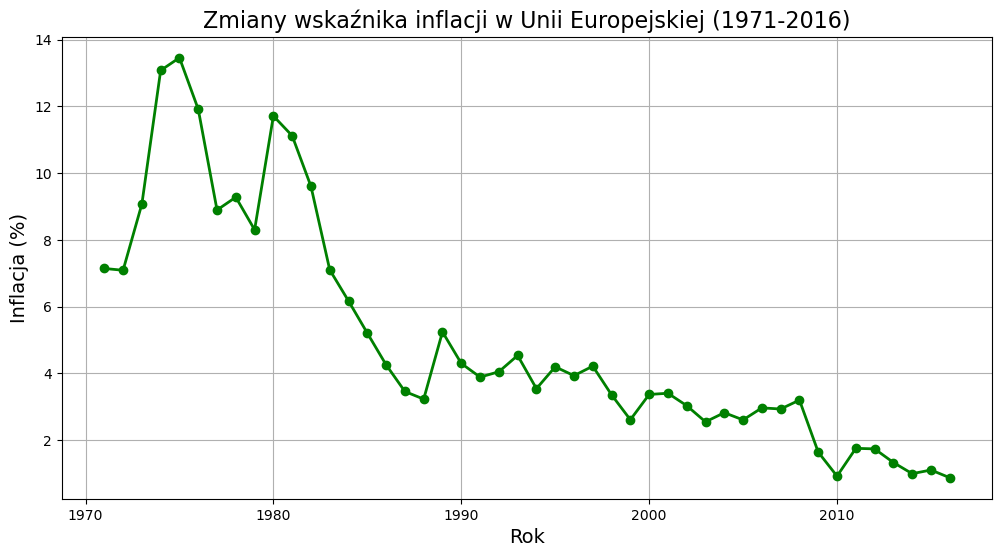

In [36]:
import matplotlib.pyplot as plt
filter_data = df[(df['Year'] >= 1971) & (df['Year'] <= 2016)]

#unique_countries = df[['Country']].drop_duplicates()
#print(unique_countries)

#uniqe_country = pd.DataFrame(unique_countries)
#uniqe_country.to_csv("uniqe_country.csv", index=False)

eu_data = filter_data[filter_data['Country'].isin(["European Union"])]
eu_data

plt.figure(figsize=(12, 6))
plt.plot(eu_data['Year'], eu_data['Inflation'], marker='o', linestyle='-', linewidth=2, color='green')
plt.title("Zmiany wskaźnika inflacji w Unii Europejskiej (1971-2016)", fontsize=16)
plt.xlabel("Rok", fontsize=14)
plt.ylabel("Inflacja (%)", fontsize=14)
plt.grid(True)

plt.show()

Rozwiązanie podpunktu **(d)**

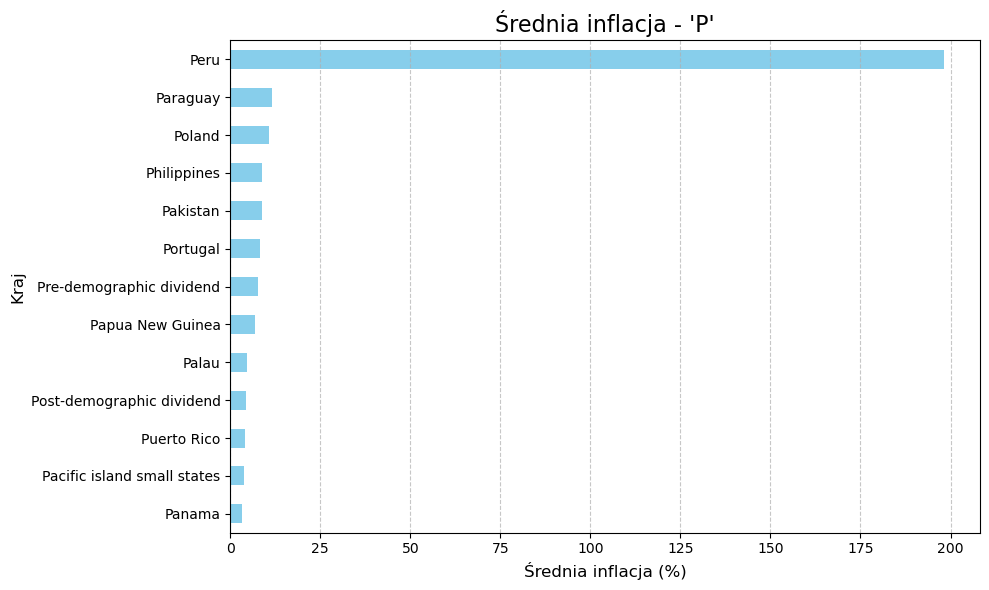

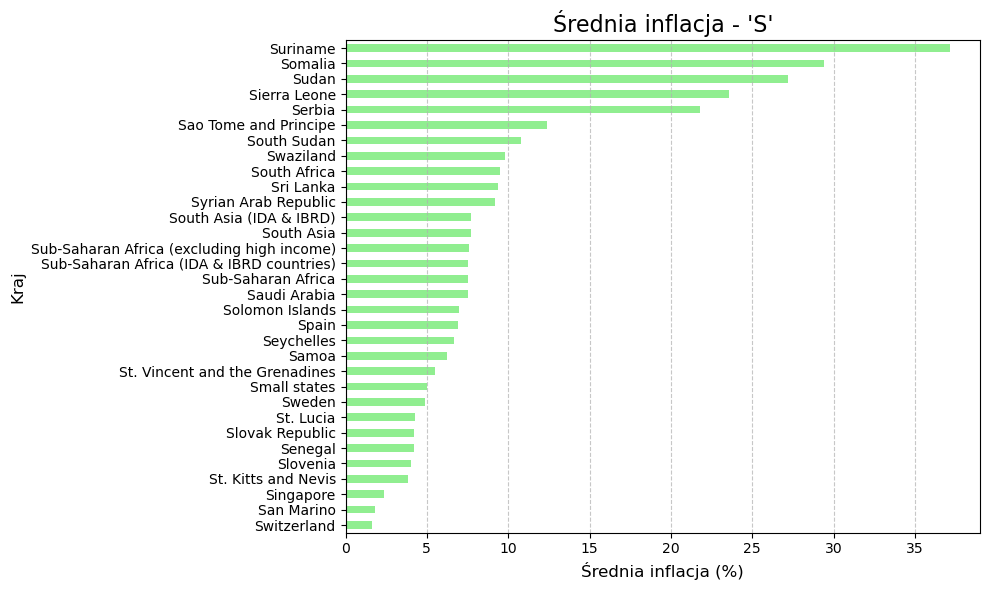

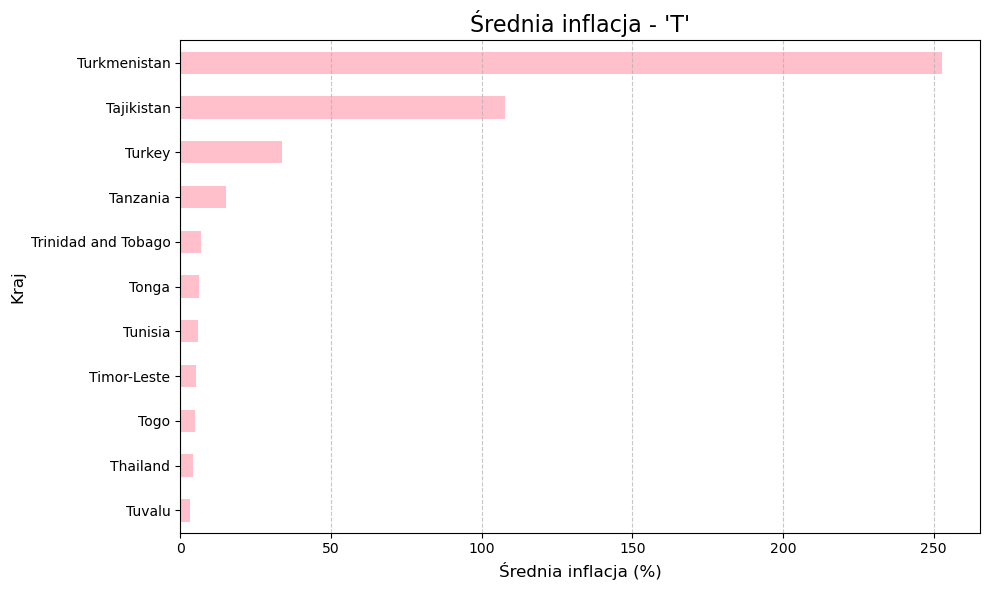

In [55]:
#d) Wygenerować 3 oddzielne poziome wykresy słupkowe uśrednionej wartości wskaźnika 
#inflacji dla wartości PKB dla poszczególnych państw zaczynających się
#na litery "P", "S", "T"

pCountries =  df[df['Country'].str.startswith('P')]
sCountries =  df[df['Country'].str.startswith('S')]
tCountries =  df[df['Country'].str.startswith('T')]

avg_inflation_P = pCountries.groupby('Country')['Inflation'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_inflation_P.plot(kind='barh', color='skyblue')
plt.title("Średnia inflacja - 'P'", fontsize=16)
plt.xlabel("Średnia inflacja (%)", fontsize=12)
plt.ylabel("Kraj", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

avg_inflation_S = sCountries.groupby('Country')['Inflation'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_inflation_S.plot(kind='barh', color='lightgreen')
plt.title("Średnia inflacja - 'S'", fontsize=16)
plt.xlabel("Średnia inflacja (%)", fontsize=12)
plt.ylabel("Kraj", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

avg_inflation_T = tCountries.groupby('Country')['Inflation'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_inflation_T.plot(kind='barh', color='pink')
plt.title("Średnia inflacja - 'T'", fontsize=16)
plt.xlabel("Średnia inflacja (%)", fontsize=12)
plt.ylabel("Kraj", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Rozwiązanie podpunktu **(e)**

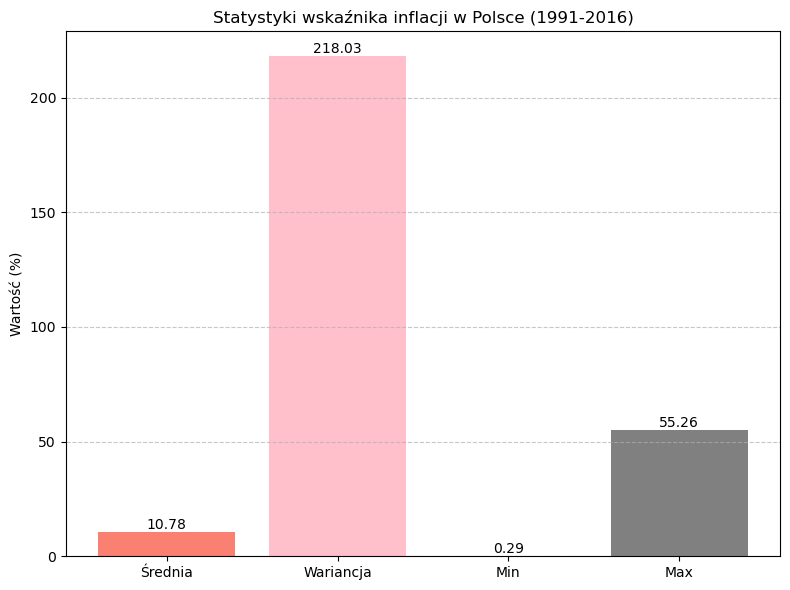

In [76]:
# Wygenerować stosowny rodzaj wykresu wizualizujący wartość średnią, 
# wariancję, wartość maksymalną, wartość minimalną wskaźnika inflacji dla
# wartości PKB dla Polski w latach 1991 - 2016.

import matplotlib.pyplot as plt

filter_data = df[(df['Year'] >= 1991) & (df['Year'] <= 2016)]
poland_data = filter_data[filter_data['Country'].isin(["Poland"])]
poland_data

stats = {
    "Średnia": poland_data['Inflation'].mean(),
    "Wariancja": poland_data['Inflation'].var(),
    "Min": poland_data['Inflation'].min(),
    "Max": poland_data['Inflation'].max(),
}

plt.figure(figsize=(8, 6))
bars = plt.bar(stats.keys(), stats.values(), color=['salmon', 'pink', 'lightblue', 'gray'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.title("Statystyki wskaźnika inflacji w Polsce (1991-2016)")
plt.ylabel("Wartość (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---
##Zadanie 2 (Oczyszczanie zbioru danych) - 1 punkt za aktywność

---

**a)** Pobrać *folder* zip zawierający pliki typu *csv* ze strony:

https://data.worldbank.org/country/poland?view=chart

z pobranego folderu  proszę operować na pliku o nazwie roboczej:

*API_POL_DS2_en_csv_v2_24804*


**b)** Wygenerować opis zawartości pliku.

**c)** Zredukować zbiór danych do rekordów dotyczących lat 2000 - 2020.

**d)** Wyznaczyć liczbę pustych pól w każdym z poszczególnych atrybutów zredukowanego zbioru danych z podpunktu (c).

**e)** Usunąć kolumny (nie obserwacje) zredukowanego zbioru danych mające więcej niż 10% pustych pól. W pozostałych kolumnach proszę zapełnić puste pola wartością będącą średnią arytmetyczną pomiędzy dwiema najbliższymi niezerowymi rekordami (w przypadkach brzegowych ograniczyć się do pojedynczej najbliższej niezerowej wartości).

**f**) Wygenerować opis zredukowanego zbioru danych po modyfikacjach z podpunktów (d), (e).

Rozwiązanie podpunktu **(a)**

Rozwiązanie podpunktu **(b)**

Rozwiązanie podpunktu **(c)**

Rozwiązanie podpunktu **(d)**

Rozwiązanie podpunktu **(e)**

Rozwiązanie podpunktu **(f)**

---
##Zadanie 3 (Regresja liniowa - wstęp) - 1 punkt za aktywność
---

**a)** Pobrać plik typu *csv* ze strony:

https://datacatalog.worldbank.org/search/dataset/0037996/Statistical-Performance-Indicators

**b)** Wygenerować opis zawartości pobranego zbioru danych.

**c)** Usunąć ze zbioru danych kolumny zawierające kategoryczne atrybuty za wyjątkiem:

  * 1) kolumny zawierającej atrybut pełnej nazwy państwa,

  * 2) kolumny zawierającej atrybut określający słowny stopień generowanego dochodu poszczególnych państw (zastosować do tej kolumny stosowną kwantyzację).

**d)** Uczynić atrybut *SPI.INDEX* atrybutem decyzyjnym (uczynić tę kolumnę ostatnią w rozpatrywanym zmodyfikowanym zbiorze danych).

**e)** Przeprowadzić liniową regresję względem wytworzonego zbioru danych ustalając podział na zbiór testowy i walidacyjny w stosunku 80%:20 %.

**f)** Wydrukować wartości liczbowe charakteryzujące wytworzony model z dokładnością do 4 cyfr znaczących.


Rozwiązanie podpunktu **(a)**

Rozwiązanie podpunktu **(b)**

Rozwiązanie podpunktu **(c)**

Rozwiązanie podpunktu **(d)**

Rozwiązanie podpunktu **(e)**

Rozwiązanie podpunktu **(f)**